In [8]:
import pandas as pd
import numpy as np
import re 
import seaborn as sns
import matplotlib.pyplot as plt

#import KC_Age and KC_Income data

age = pd.read_csv(r'C:\Users\colli\Desktop\KC Coffee Project\KC_Age.csv')
income = pd.read_csv(r'C:\Users\colli\Desktop\KC Coffee Project\KC_Income.csv')

#start with age data. Data only includes ages 15-44, as well as a subsection of those ages 18-24.
#we are given total population of the age group in that zipcode as well as the percent of that zip codes total population.
age.head()

,Zip_Code,Total_Pop,18-24_Pop,18-24_Percentage,15-44_Pop,15-44_Percentage,Median_Age
0,"Kansas City, MO-KS Metro Area!!Percent!!Estimate",2176124,174148,8.0%,863079,39.7%,37.6
1,ZCTA5 64001!!Percent!!Estimate,788,61,7.7%,246,31.2%,39.1
2,ZCTA5 64011!!Percent!!Estimate,4092,366,8.9%,1456,35.6%,48.4
3,ZCTA5 64012!!Percent!!Estimate,27884,2106,7.6%,10465,37.5%,38.4
4,ZCTA5 64014!!Percent!!Estimate,28044,1840,6.6%,10532,37.6%,36.1


In [2]:
#extract just the zip code from the zip code column by defining a function extract_zip
#drop Kansas City Population row. It is useful information, but will skew our results and charts.

def extract_zip(zip_str):
    match = re.search(r'\d{5}', zip_str)
    return match.group() if match else ""

age['Zip_Code'] = age['Zip_Code'].apply(extract_zip)

age = age.drop(0)

age.head()

,Zip_Code,Total_Pop,18-24_Pop,18-24_Percentage,15-44_Pop,15-44_Percentage,Median_Age
1,64001,788,61,7.7%,246,31.2%,39.1
2,64011,4092,366,8.9%,1456,35.6%,48.4
3,64012,27884,2106,7.6%,10465,37.5%,38.4
4,64014,28044,1840,6.6%,10532,37.6%,36.1
5,64015,31269,2237,7.2%,11127,35.6%,39.5


In [3]:
age.dtypes

Zip_Code             object
Total_Pop             int64
18-24_Pop             int64
18-24_Percentage     object
15-44_Pop             int64
15-44_Percentage     object
Median_Age          float64
dtype: object

In [4]:
#need to change our percentage columns to float for calculations. We wont be doing any on Zip_code, so we can leave as object.
age['18-24_Percentage'] = pd.to_numeric(age['18-24_Percentage'].str.rstrip('%'), errors='coerce') / 100.0
age['15-44_Percentage'] = pd.to_numeric(age['15-44_Percentage'].str.rstrip('%'), errors='coerce') / 100.0

age.dtypes

Zip_Code             object
Total_Pop             int64
18-24_Pop             int64
18-24_Percentage    float64
15-44_Pop             int64
15-44_Percentage    float64
Median_Age          float64
dtype: object

In [5]:
age.describe()

#numbers to note: at least one zip_code has a total_pop of 0. Possible in industrial, undeveloped, or rural areas.
#at least one zip_code has 100% of population in 15-44 age bracket. Unlikely. 

,Total_Pop,18-24_Pop,18-24_Percentage,15-44_Pop,15-44_Percentage,Median_Age
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,9922.785088,835.929825,0.079189,3964.381579,0.371373,38.817105
std,11469.894252,1178.348779,0.063152,4737.096945,0.111120,9.245016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1068.250000,79.000000,0.053000,372.750000,0.321000,35.375000
50%,5915.500000,351.000000,0.073000,2214.500000,0.366000,39.050000
75%,14794.250000,1258.500000,0.090250,6087.250000,0.406000,42.625000
max,76000.000000,11261.000000,0.763000,32145.000000,1.000000,64.100000


In [6]:
#to weed out any areas with a low population of locals we will look at only Zip_code with over 10k
target_pop = age[age['Total_Pop'] > 10000]

target_pop.head()

,Zip_Code,Total_Pop,18-24_Pop,18-24_Percentage,15-44_Pop,15-44_Percentage,Median_Age
3,64012,27884,2106,0.076,10465,0.375,38.4
4,64014,28044,1840,0.066,10532,0.376,36.1
5,64015,31269,2237,0.072,11127,0.356,39.5
12,64024,15146,1597,0.105,5739,0.379,38.3
14,64029,20731,1355,0.065,8078,0.390,36.9


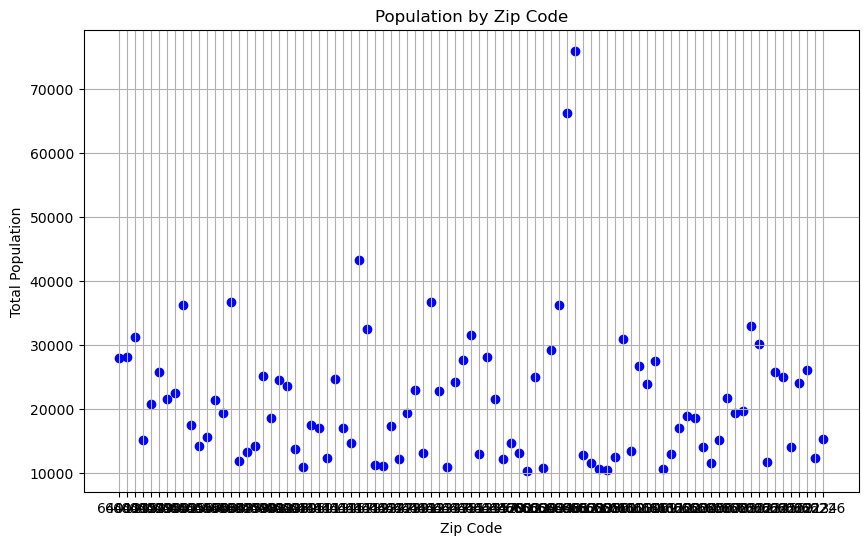

In [7]:
#make a quick scatter chart just to see if there are any zipcodes with extremely high population


plt.figure(figsize=(10, 6))
plt.scatter(target_pop['Zip_Code'], target_pop['Total_Pop'], color='blue', marker='o')
plt.title('Population by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Total Population')
plt.grid(True)
plt.show()

#looks like we have a few that sit above 40k pop, and most that sit between 10k-40k.

In [9]:
#now that we have a good overview and have cleaned up the age table lets export it as a reference of possible target zip codes.

target_pop.to_csv('target_pop.csv', index=False)

#this is csv will be helpful to highlight promising zip codes. It was taken our original 228 values down to just 90!